In [151]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly as px

In [152]:
df = pd.read_excel('car_data1.xlsx',index=True)

In [153]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [154]:
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [156]:
df.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [157]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,2,small,high,unacc
freq,432,432,432,576,576,576,1210


## Exploratory Data Analysis

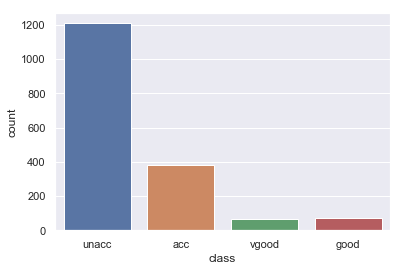

In [158]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='class', data=df)
plt.show()

In [165]:
df['safety'].value_counts()


high    576
low     576
med     576
Name: safety, dtype: int64

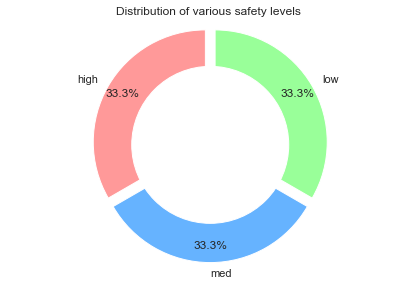

In [167]:
# Pie chart
labels = ['high', 'med', 'low']
sizes = [576, 576, 576]

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
#explsion
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribution of various safety levels ')
plt.show()

Using the count plot we notice there are a lot of samples belonging to one class which clearly depicts class imbalance, hence we will use undersampling method to calculate the metrics

In [124]:
map1= {'unacc':0,'acc':1,'vgood':2,'good':3}
df['class']=df['class'].map(map1)


In [125]:
df['class'].value_counts()

0    1210
1     384
3      69
2      65
Name: class, dtype: int64

In [126]:
# Class count
count_class_0, count_class_1,count_class_2,count_class_3 = df['class'].value_counts()

# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
df_class_2=  df[df['class'] == 2]
df_class_3=  df[df['class'] == 3]

RANDOM UNDERSAMPLING METHOD

Random under-sampling:
1    384
0    384
3     69
2     65
Name: class, dtype: int64


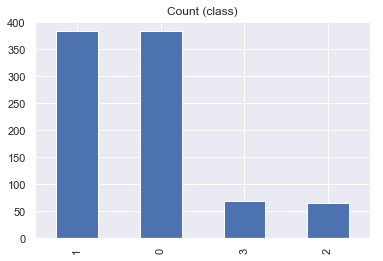

In [127]:
df_class_0_undersampled = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_undersampled, df_class_1,df_class_2,df_class_3], axis=0)

print('Random under-sampling:')
print(df_under['class'].value_counts())

df_under['class'].value_counts().plot(kind='bar', title='Count (class)');

In [128]:
print(df_under['buying'].value_counts())
print(df_under['doors'].value_counts())
print(df_under['persons'].value_counts())
print(df_under['lug_boot'].value_counts())
print(df_under['safety'].value_counts())
print(df_under['maint'].value_counts())

low      260
med      244
high     211
vhigh    187
Name: buying, dtype: int64
5more    240
4        226
3        224
2        212
Name: doors, dtype: int64
4       366
more    359
2       177
Name: persons, dtype: int64
big      320
med      305
small    277
Name: lug_boot, dtype: int64
high    379
med     340
low     183
Name: safety, dtype: int64
med      254
low      244
high     214
vhigh    190
Name: maint, dtype: int64


In [129]:
map2= {'low':0,'med':1,'high':2,'vhigh':3}
map3= {'3':3,'4':4,'5more':5,'2':2}
map4= {'2':2,'more':5,'4':4}
map5= {'small':0,'med':1,'big':2}
map6= {'low':0,'med':1,'high':2}
map7= {'low':0,'med':1,'high':2,'vhigh':3}

df_under['buying']  =   df_under['buying'].map(map2)
df_under['doors']   =   df_under['doors'].map(map3)
df_under['persons'] =   df_under['persons'].map(map4)
df_under['lug_boot']=   df_under['lug_boot'].map(map5)
df_under['safety']  =   df_under['safety'].map(map6)
df_under['maint']   =   df_under['maint'].map(map7)

In [130]:
df_under.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1.360310,1.388027,3.547672,4.005543,1.047672,1.217295,0.799335
std,1.105881,1.095947,1.118630,1.088214,0.812602,0.759264,0.874271
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,5.000000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


In [131]:

df_under['class'].replace((0, 1, 2, 3), (0, 0, 1, 1), inplace = True)

df_under['class'].value_counts()

0    768
1    134
Name: class, dtype: int64

In [132]:
df_under.head()

,buying,maint,doors,persons,lug_boot,safety,class
1317,0,3,2,5,1,0,0
1516,0,1,2,2,1,1,0
91,3,3,5,4,0,1,0
153,3,2,3,5,0,0,0
59,3,3,4,2,1,2,0


In [133]:
X= df_under.drop('class',axis=1)
y= df_under['class']

In [134]:
X.shape

(902, 6)

In [107]:
y.shape

(902,)

### Logistic Regression

In [143]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)
ypred1=logreg_cv.predict(X_test)

print(logreg_cv.score(X_test,y_test))

print(classification_report(y_test, y_pred))
# Print the optimal parameters 
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sk

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sk

0.9473684210526315
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       305
           1       0.98      0.95      0.96        56

   micro avg       0.99      0.99      0.99       361
   macro avg       0.99      0.97      0.98       361
weighted avg       0.99      0.99      0.99       361

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sk

Thus we obtained an accuracy of 94% with Logistic Regression and obtained its best parameters using GridSearchCV

### Support Vector Classifier

In [144]:
# Instantiate a Support Vector classifier: Svc
Svc= SVC()
# Setup the parameters and distributions to sample from: param_grid
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=21)

# Instantiate the GridSearchCV object: Svc_cv
Svc_cv = GridSearchCV(Svc,param_grid,cv=5)

Svc_cv.fit(X_train,y_train)
y_pred= Svc_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(Svc_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(Svc_cv.best_params_))

Accuracy: 0.9944598337950139
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       313
           1       0.96      1.00      0.98        48

   micro avg       0.99      0.99      0.99       361
   macro avg       0.98      1.00      0.99       361
weighted avg       0.99      0.99      0.99       361

Tuned Model Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


THUS SVC GIVES US AN ACCURACY OF 99% and we also obtained the best parameters

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [150]:

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=32)

# Fit it to the data
tree_cv.fit(X_train,y_train)

ypred2 = tree_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(tree_cv.score(X_test, y_test)))
print(classification_report(y_test, ypred2))
print("Tuned Model Parameters: {}".format(tree_cv.best_params_))

Accuracy: 0.9750692520775623
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       303
           1       0.95      0.90      0.92        58

   micro avg       0.98      0.98      0.98       361
   macro avg       0.96      0.94      0.95       361
weighted avg       0.97      0.98      0.97       361

Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}
